<a href="https://colab.research.google.com/github/afnanrahman/EAFP/blob/OmerAndKevin/EDAOmer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Questions
In this EDA, we will consider the following 2 questions:

1.   Does a person’s age/gender affect their pay rate?
2.   What gender quits their job more across different departments?

Note - Will look at these two columns separately

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data from Git Repo

In [6]:
# Reading CSV from raw link to public Git repo
clean_data_df = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/OmerAndKevin/data/clean_data.csv")
clean_data.head()

,Unnamed: 0,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,rate_avg
0,0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,6891.666667
1,1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,8415.666667
2,2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,1287.000000
3,3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,8202.333333
4,4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,5754.333333


In [7]:
non_encoded_df = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/OmerAndKevin/data/no_encoding_data.csv", index_col=0)
non_encoded_df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,rate_avg
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Yes,11,3,1,0,8,0,1,6,4,5,6891.666667
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,No,23,4,4,1,10,3,3,10,7,7,8415.666667
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,1287.000000
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Yes,11,3,3,0,8,3,3,8,7,0,8202.333333
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,No,12,3,4,1,6,3,3,2,2,2,5754.333333


Decided to work with the **non_encoded_df** to retain original categorical labels.

# First Look at Datset: Initial EDA

In [8]:
print(" SHAPE OF DATASET ".center(60, "-"))
print("Rows: {}".format(non_encoded_df.shape[0]))
print("Columns: {}\n".format(non_encoded_df.shape[1]))
print(" DATA TYPES OF COLUMNS ".center(60, "-"))
print(non_encoded_df.dtypes)
print(" MISSING VALUES ".center(60, "-"))
print(non_encoded_df.isna().sum())
print(" DUPLICATED VALUES ".center(60, "-"))
print(non_encoded_df.duplicated().sum())

--------------------- SHAPE OF DATASET ---------------------
Rows: 1470
Columns: 31

------------------ DATA TYPES OF COLUMNS -------------------
age                            int64
attrition                     object
business_travel               object
daily_rate                     int64
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_number                int64
environment_satisfaction       int64
gender                        object
hourly_rate                    int64
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_rate                   int64
num_companies_worked           int64
over_time                     object
percent_salary_hike            int64
performance_rating             int64
relationship_satisfaction      int64
sto

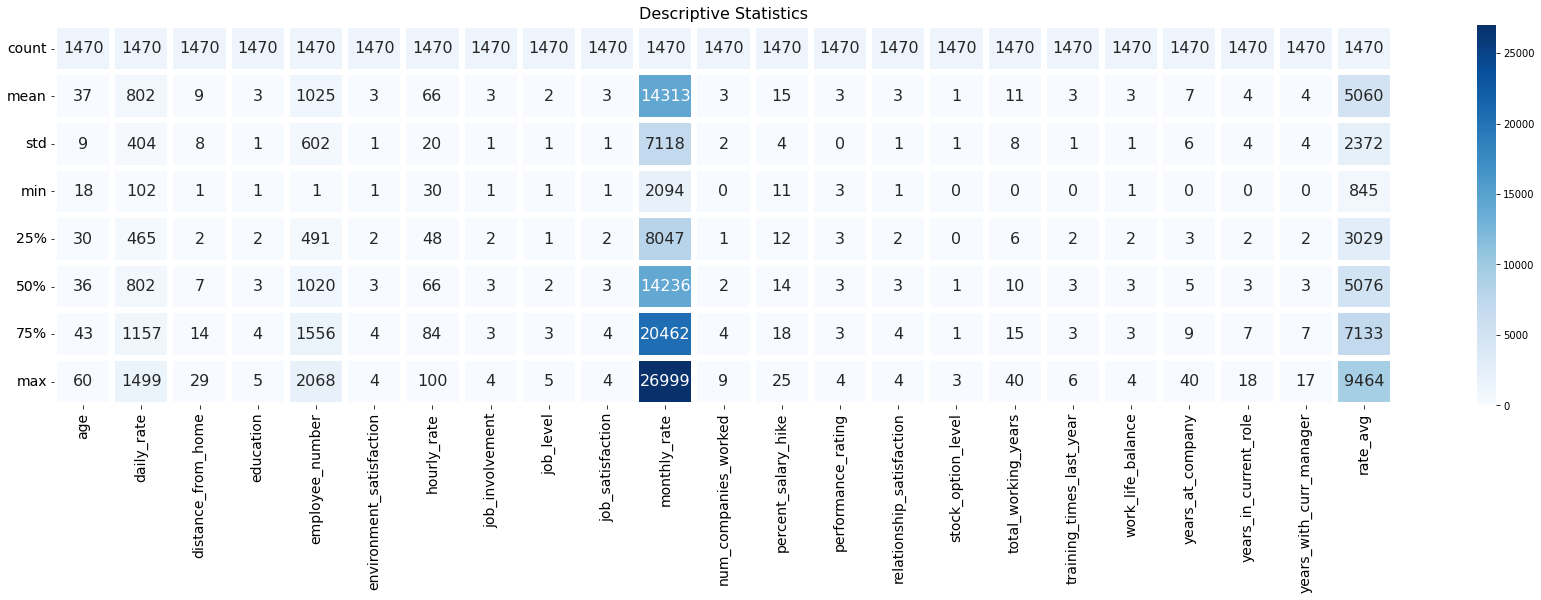

In [14]:
non_encoded_info = non_encoded_df.describe()

fig, ax = plt.subplots(figsize=(30, 7))
sns.heatmap(non_encoded_info, annot=True, annot_kws={"size":16}, fmt=".0f", linewidths=5, ax=ax, cmap="Blues")
plt.xticks(size=14, rotation=90)
plt.yticks(size=14, rotation=0)
plt.title("Descriptive Statistics", size=16)

plt.show()

# Question 1: Age/Gender affect Pay?



## Exploring Age

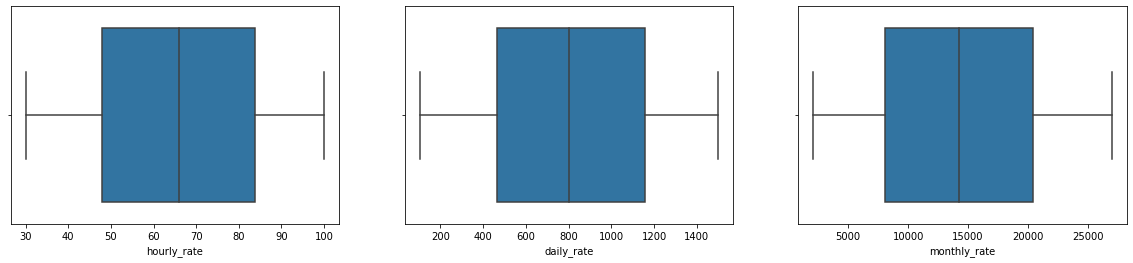

In [118]:
# Any outliers in our dataset?
cols = ["hourly_rate", "daily_rate", "monthly_rate"]
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
for col in cols:
  sns.boxplot(data=non_encoded_df, x=col, ax=ax[cols.index(col)])
plt.show()

# RESULT: No outliers in these columns

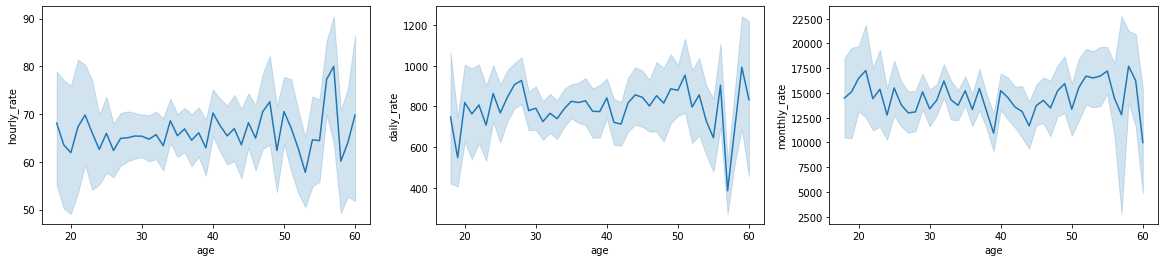

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
for col in cols:
  sns.lineplot(data=non_encoded_df, x="age", y=col, ax=ax[cols.index(col)])
plt.show()

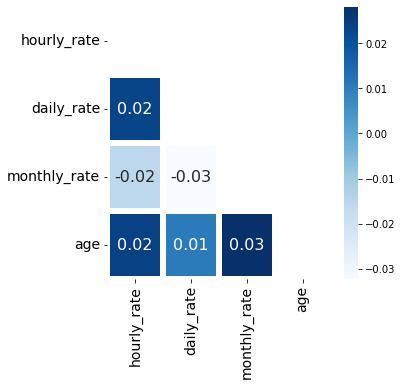

In [149]:
fig, ax = plt.subplots(figsize=(5, 5))
cols.append("age")
matrix = np.triu(non_encoded_df[cols].corr(method="pearson"))
sns.heatmap(non_encoded_df[cols].corr(), mask=matrix, annot=True, annot_kws={"size":16}, linewidths=5, fmt=".2f", ax=ax, cmap="Blues")
plt.xticks(size=14, rotation=90)
plt.yticks(size=14, rotation=0)
plt.show()

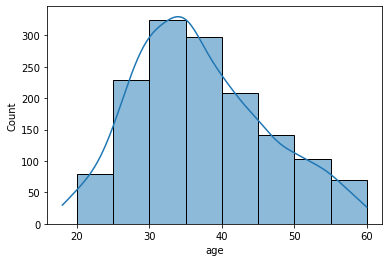

In [137]:
age_counts = non_encoded_df["age"].value_counts().to_frame()
age_counts.columns = ["count"]
sns.histplot(data=non_encoded_df, x="age", bins=[20,25,30,35,40,45,50,55,60], kde=True)

In [212]:
age_counts

,count
35,78
34,77
31,69
36,69
29,68
32,61
30,60
33,58
38,58
40,57


In [123]:
age_counts.describe()

,count
count,43.000000
mean,34.186047
std,21.400107
min,4.000000
25%,17.000000
50%,30.000000
75%,49.000000
max,78.000000


In [161]:
non_encoded_df['age_qcut'] = pd.qcut(non_encoded_df["age"], q=3, precision=1)
non_encoded_df["age_qcut"].value_counts()

(17.9, 32.0]    516
(32.0, 40.0]    489
(40.0, 60.0]    465
Name: age_qcut, dtype: int64

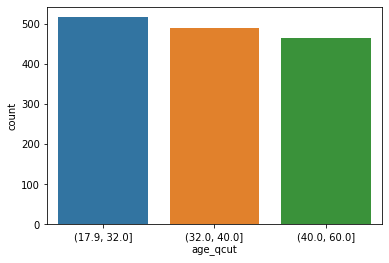

In [162]:
sns.countplot(data=non_encoded_df, x="age_qcut")

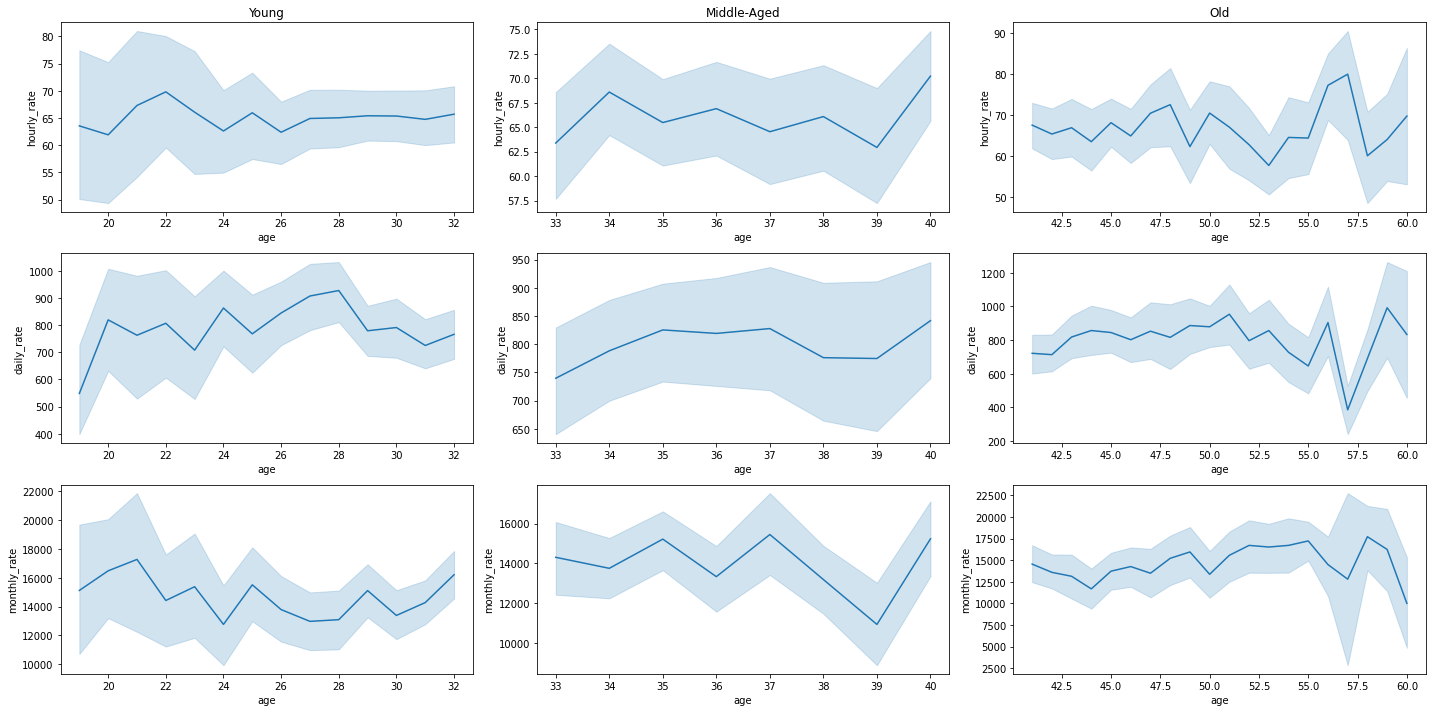

In [208]:
fig, axes = plt.subplots(3, 3, figsize=(20,10))
young = non_encoded_df[(non_encoded_df["age"] > 18) & (non_encoded_df["age"] <= 32)]["age"]
middle = non_encoded_df[(non_encoded_df["age"] > 32) & (non_encoded_df["age"] <= 40)]["age"]
old = non_encoded_df[(non_encoded_df["age"] > 40) & (non_encoded_df["age"] <= 60)]["age"]

cols = ["hourly_rate", "daily_rate", "monthly_rate"]
groups = [young, middle, old]
i = 0
j = 0
for col in cols:
  for group in groups:
    sns.lineplot(data=non_encoded_df, x=group, y=col, ax=axes[i][j])
    j = j + 1
  j = 0
  i = i + 1

cols = ["Young", "Middle-Aged", "Old"]
for ax, col in zip(axes[0], cols):
    ax.set_title(col)
fig.tight_layout()
plt.show()

## Exploring Gender

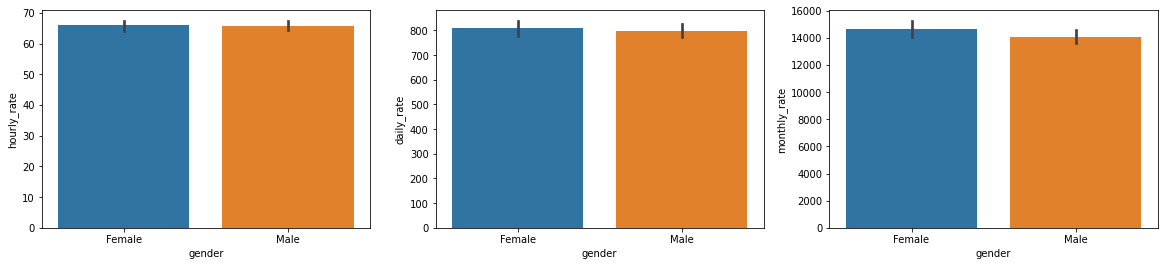

In [214]:
fig, ax = plt.subplots(1, 3, figsize=(20, 4))
cols = ["hourly_rate", "daily_rate", "monthly_rate"]
for col in cols:
  sns.barplot(data=non_encoded_df, x="gender", y=col, ax=ax[cols.index(col)])
plt.show()

## Conclusion
Cannot conclude that age nor gender creates a substantial impact on the payrate of an individual within this dataset. 
Perhaps, IBM actually did a good job surveying people? 

# Question 2: Attrition by Gender and Department?

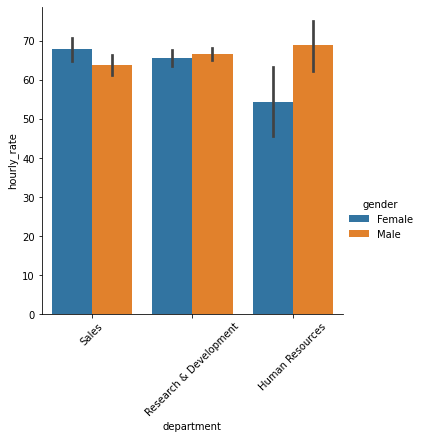

In [238]:
sns.catplot(data=non_encoded_df, x="department", y="hourly_rate", hue="gender", kind="bar")
plt.xticks(rotation=45)
plt.show()

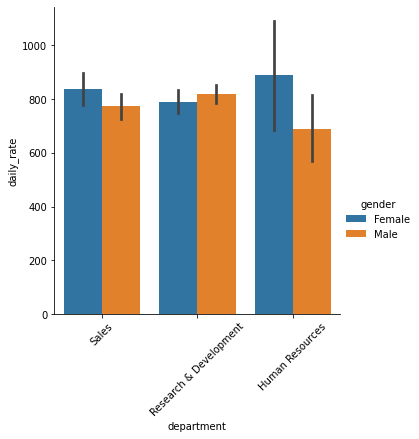

In [236]:
sns.catplot(data=non_encoded_df, x="department", y="daily_rate", hue="gender", kind="bar")
plt.xticks(rotation=45)
plt.show()

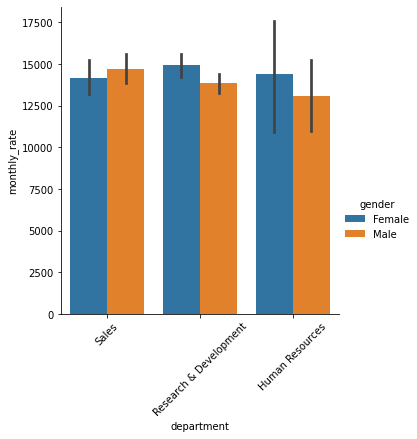

In [237]:
sns.catplot(data=non_encoded_df, x="department", y="monthly_rate", hue="gender", kind="bar")
plt.xticks(rotation=45)
plt.show()

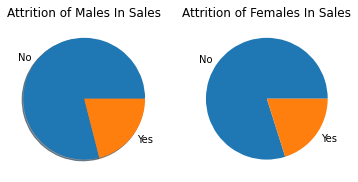

In [263]:
sales_gender = non_encoded_df[non_encoded_df["department"] == "Sales"]["gender"]
idx = (sales_gender[sales_gender == "Male"]).index

plt.subplot(1,2,1)
plt.pie(non_encoded_df.iloc[idx]["attrition"].value_counts(), labels = ["No", "Yes"], shadow = True)
plt.title("Attrition of Males In Sales")

plt.subplot(1,2,2)
idx = (sales_gender[sales_gender == "Female"]).index
plt.pie(non_encoded_df.iloc[idx]["attrition"].value_counts(), labels = ["No", "Yes"], shadow = False)
plt.title("Attrition of Females In Sales")

plt.show()

In [265]:
idx = (sales_gender[sales_gender == "Male"]).index
non_encoded_df.iloc[idx]["attrition"].value_counts()

No     203
Yes     54
Name: attrition, dtype: int64

In [266]:
idx = (sales_gender[sales_gender == "Female"]).index
non_encoded_df.iloc[idx]["attrition"].value_counts()

No     151
Yes     38
Name: attrition, dtype: int64

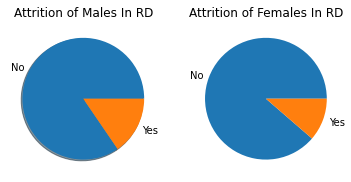

In [276]:
sales_gender = non_encoded_df[non_encoded_df["department"] == "Research & Development"]["gender"]
idx = (sales_gender[sales_gender == "Male"]).index

plt.subplot(1,2,1)
plt.pie(non_encoded_df.iloc[idx]["attrition"].value_counts(), labels = ["No", "Yes"], shadow = True)
plt.title("Attrition of Males In RD")

plt.subplot(1,2,2)
idx = (sales_gender[sales_gender == "Female"]).index
plt.pie(non_encoded_df.iloc[idx]["attrition"].value_counts(), labels = ["No", "Yes"], shadow = False)
plt.title("Attrition of Females In RD")

plt.show()

In [277]:
idx = (sales_gender[sales_gender == "Male"]).index
non_encoded_df.iloc[idx]["attrition"].value_counts()

No     492
Yes     90
Name: attrition, dtype: int64

In [278]:
idx = (sales_gender[sales_gender == "Female"]).index
non_encoded_df.iloc[idx]["attrition"].value_counts()

No     336
Yes     43
Name: attrition, dtype: int64

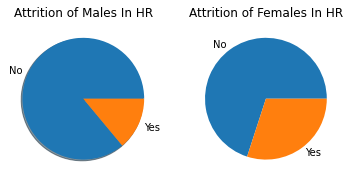

In [279]:
sales_gender = non_encoded_df[non_encoded_df["department"] == "Human Resources"]["gender"]
idx = (sales_gender[sales_gender == "Male"]).index

plt.subplot(1,2,1)
plt.pie(non_encoded_df.iloc[idx]["attrition"].value_counts(), labels = ["No", "Yes"], shadow = True)
plt.title("Attrition of Males In HR")

plt.subplot(1,2,2)
idx = (sales_gender[sales_gender == "Female"]).index
plt.pie(non_encoded_df.iloc[idx]["attrition"].value_counts(), labels = ["No", "Yes"], shadow = False)
plt.title("Attrition of Females In HR")

plt.show()

In [280]:
idx = (sales_gender[sales_gender == "Male"]).index
non_encoded_df.iloc[idx]["attrition"].value_counts()

No     37
Yes     6
Name: attrition, dtype: int64

In [281]:
idx = (sales_gender[sales_gender == "Female"]).index
non_encoded_df.iloc[idx]["attrition"].value_counts()

No     14
Yes     6
Name: attrition, dtype: int64

## Conclusion
*   In Sales: Males and Females have the same proportions of attrition, roughy 26%.
*   In RD: Females have 18% attrition, compared to 13% of males
*   In HR: Females have 42% attrition, compared to 16% of males


